<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Computação em Nuvem III
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>AWS EC2;</li>
  <li>AWS SageMaker;</li>
  <li>AWS Acesso Externo.</li>
</ol>

---

# **Exercícios**

## 1\. AWS SageMaker

> O AWS [SageMaker](https://aws.amazon.com/pt/sagemaker/) é o nome de um conjunto de serviços voltados para análise/ciência de dados e aprendizado de máquina. Dentre os serviços, está o de *notebooks*, a versão da AWS do Google Colab. O serviço de *notebooks* é inspirado no famoso projeto *open source* [Jupyter](https://jupyter.org) (combinação do nome das linguagens de programação Julia, Python e R).



> > **Nota**: Diferente do Google Colab, um *notebook* do AWS [SageMaker](https://aws.amazon.com/pt/sagemaker/) é **permanente**;

### **1.1. Funcionamento** 

1. Para criar um *notebook*, deve-se escolher uma instância de máquina virtual AWS [EC2](https://aws.amazon.com/pt/ec2/) e uma *role* do AWS [IAM](https://aws.amazon.com/pt/iam/); 
2. Assim como AWS [EC2](https://aws.amazon.com/pt/ec2/), *notebooks* podem ser iniciados/desligados, acessados, excluídos, etc.

### **1.2. Atividade** 

 - Criar um *bucket* no AWS [S3](https://aws.amazon.com/pt/s3/);
 - Fazer o *upload* de um objeto no *bucket* do AWS [S3](https://aws.amazon.com/pt/s3/);
 - Criar um *notebook* no AWS [SageMaker](https://aws.amazon.com/pt/sagemaker/);
 - Carregar o objeto do *bucket* do AWS [S3](https://aws.amazon.com/pt/s3/) no *notebook*;
 - Desligar a instância do AWS [EC2](https://aws.amazon.com/pt/ec2/) do *notebook*.

Objeto para o *bucket*.

In [1]:
%%writefile cotacao.csv
date,usd,eur,gbp
2021-01-21,5.4582,6.1896,7.3980
2021-01-20,5.4191,6.1290,7.3673
2021-01-19,5.4383,6.1676,7.3994
2021-01-18,5.5666,6.3042,7.5672

Writing cotacao.csv


> **Caminho bucket: 's3//ebac-modulo40-sagemaker/'

Código de leitura:

In [ ]:
# -- Código de leitura:
import boto3
import pandas as pd

BUCKET = 'ebac-modulo40-sagemaker'

df = pd.read_csv(f's3://{BUCKET}/cotacao.csv')
df.head()

> **Criação do notebook na AWS SageMaker:**

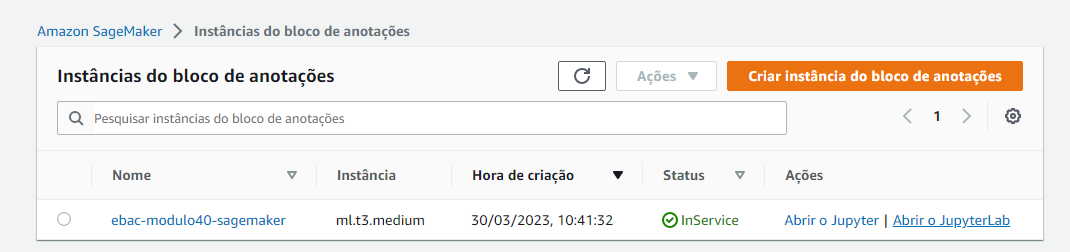

> **Leitura do arquivo no JupiterLab:**

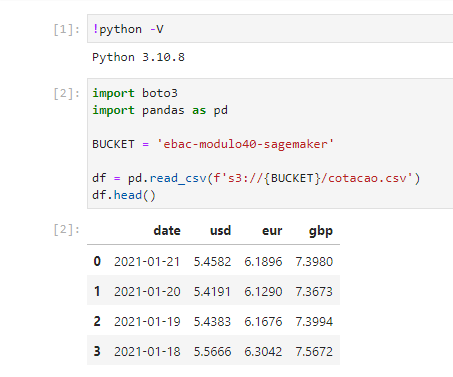

> Após a execução foi realizado o Shut Down do notebook e a máquina virtual foi **desligada**.

## 2\. AWS Acesso Externo

Para interagir externamente com os serviços da AWS, basta criar um usuário de acesso programático. O usuário é identificado por uma credencial do tipo chave-valor.

### **2.1. Atividade** 

1. No AWS [IAM](https://aws.amazon.com/pt/iam/), criar um usuário programático;
2. Adicionar política de leitura em *buckets* do AWS [S3](https://aws.amazon.com/pt/s3/);
3. Salvar a credencial em um arquivo CSV.

 - Instalar o `boto3`

In [5]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 8.7 MB/s eta 0:00:00


- Configurar as credenciais

In [8]:
# -- Chave de acesso (ID)
from getpass import getpass
aws_access_key_id = getpass()

··········


In [9]:
# -- Chave de acesso (chave secreta)
from getpass import getpass
aws_secret_access_key = getpass()

··········


> **Conectando e interagindo com o bucket do AWS S3**

In [10]:
import boto3
import pandas as pd

client = boto3.client('s3', aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key)

In [11]:
BUCKET = 'ebac-modulo40-sagemaker'

client.download_file(BUCKET, 'cotacao.csv', 'cotacao_aws.csv')

 - Extrair

In [12]:
#Lendo com o pandas:
df = pd.read_csv('cotacao_aws.csv')
df.head()

,date,usd,eur,gbp
0,2021-01-21,5.4582,6.1896,7.3980
1,2021-01-20,5.4191,6.1290,7.3673
2,2021-01-19,5.4383,6.1676,7.3994
3,2021-01-18,5.5666,6.3042,7.5672
